# Sentinel-5P TROPOMI - Ultraviolet Aerosol Index (UVAI) - Level 2



In [2]:
import xarray as xr

s5p_mf = xr.open_dataset('S5P_OFFL_L2__AER_AI_20220718T105527_20220718T123656_24673_03_020400_20220720T110221/S5P_OFFL_L2__AER_AI_20220718T105527_20220718T123656_24673_03_020400_20220720T110221.nc', group='PRODUCT')
s5p_mf

<xarray.Dataset> Size: 61MB
Dimensions:                          (scanline: 3736, ground_pixel: 450,
                                      time: 1, corner: 4)
Coordinates:
  * scanline                         (scanline) float64 30kB 0.0 ... 3.735e+03
  * ground_pixel                     (ground_pixel) float64 4kB 0.0 ... 449.0
  * time                             (time) datetime64[ns] 8B 2022-07-18
  * corner                           (corner) float64 32B 0.0 1.0 2.0 3.0
    latitude                         (time, scanline, ground_pixel) float32 7MB ...
    longitude                        (time, scanline, ground_pixel) float32 7MB ...
Data variables:
    delta_time                       (time, scanline) datetime64[ns] 30kB ...
    time_utc                         (time, scanline) object 30kB ...
    qa_value                         (time, scanline, ground_pixel) float32 7MB ...
    aerosol_index_354_388            (time, scanline, ground_pixel) float32 7MB ...
    aerosol_index_340_380            (time, scanline, ground_pixel) float32 7MB ...
    aerosol_index_335_367            (time, scanline, ground_pixel) float32 7MB ...
    aerosol_index_354_388_precision  (time, scanline, ground_pixel) float32 7MB ...
    aerosol_index_340_380_precision  (time, scanline, ground_pixel) float32 7MB ...
    aerosol_index_335_367_precision  (time, scanline, ground_pixel) float32 7MB ...

In [3]:
uvai = s5p_mf.aerosol_index_340_380[0,:,:]
lat = uvai.latitude
lon = uvai.longitude

In [5]:
# qa values under 0.8 can be unreliable
qa=s5p_mf.qa_value[0,:,:]
uvai_masked=uvai.where(qa > 0.8) 

In [13]:
latmin               = 43        # Minimum latitude for mapping plot [deg N]
latmax               = 47       # Maximum latitude for mapping plot [deg N]
lonmin               = -3        # Minimum lonitude for mapping plot [deg E]
lonmax               = +2        # Maximum lonitude for mapping plot [deg E]

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


# from: https://gitlab.eumetsat.int/eumetlab/atmosphere/atmosphere/-/blob/master/functions.ipynb
def visualize_pcolormesh(data_array, longitude, latitude, projection, color_scale, unit, long_name, vmin, vmax, 
                         set_global=True, lonmin=-180, lonmax=180, latmin=-90, latmax=90):
    """ 
    Visualizes a xarray.DataArray with matplotlib's pcolormesh function.
    
    Parameters:
        data_array(xarray.DataArray): xarray.DataArray holding the data values
        longitude(xarray.DataArray): xarray.DataArray holding the longitude values
        latitude(xarray.DataArray): xarray.DataArray holding the latitude values
        projection(str): a projection provided by the cartopy library, e.g. ccrs.PlateCarree()
        color_scale(str): string taken from matplotlib's color ramp reference
        unit(str): the unit of the parameter, taken from the NetCDF file if possible
        long_name(str): long name of the parameter, taken from the NetCDF file if possible
        vmin(int): minimum number on visualisation legend
        vmax(int): maximum number on visualisation legend
        set_global(boolean): optional kwarg, default is True
        lonmin,lonmax,latmin,latmax(float): optional kwarg, set geographic extent is set_global kwarg is set to 
                                            False

    """
    fig=plt.figure(figsize=(20, 10))

    ax = plt.axes(projection=projection)
   
    img = plt.pcolormesh(longitude, latitude, data_array, 
                        cmap=plt.get_cmap(color_scale), transform=ccrs.PlateCarree(),
                        vmin=vmin,
                        vmax=vmax,
                        shading='auto')

    ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=1)
    ax.add_feature(cfeature.COASTLINE, edgecolor='black', linewidth=1)

    if (projection==ccrs.PlateCarree()):
        ax.set_extent([lonmin, lonmax, latmin, latmax], projection)
        gl = ax.gridlines(draw_labels=True, linestyle='--')
        gl.top_labels=False
        gl.right_labels=False
        gl.xformatter=LONGITUDE_FORMATTER
        gl.yformatter=LATITUDE_FORMATTER
        gl.xlabel_style={'size':14}
        gl.ylabel_style={'size':14}

    if(set_global):
        ax.set_global()
        ax.gridlines()

    cbar = fig.colorbar(img, ax=ax, orientation='horizontal', fraction=0.04, pad=0.1)
    cbar.set_label(unit, fontsize=16)
    cbar.ax.tick_params(labelsize=14)
    ax.set_title(long_name, fontsize=20, pad=20.0)

 #   plt.show()
    return fig, ax

(<Figure size 2000x1000 with 2 Axes>,
 <GeoAxes: title={'center': 'Aerosol index from 380 and 340 nm'}>)

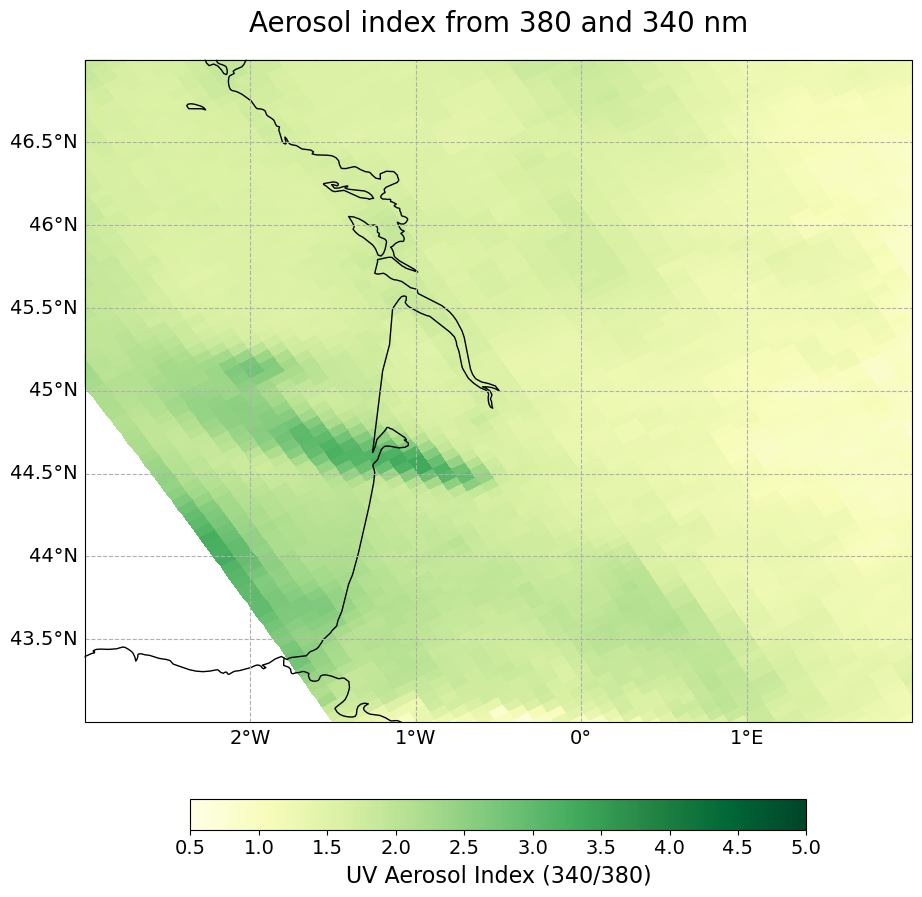

In [14]:
visualize_pcolormesh(data_array=uvai_masked,
                     longitude=lon,
                     latitude=lat,
                     projection=ccrs.PlateCarree(),
                     color_scale='YlGn',
                     unit= 'UV Aerosol Index (340/380)',
                     long_name=uvai.long_name,
                     vmin=0.5, 
                     vmax=5,
                     lonmin=lonmin,
                     lonmax=lonmax,
                     latmin=latmin,
                     latmax=latmax,
                     set_global=False)

# Other wavelength

(<Figure size 2000x1000 with 2 Axes>,
 <GeoAxes: title={'center': 'Aerosol index from 388 and 354 nm'}>)

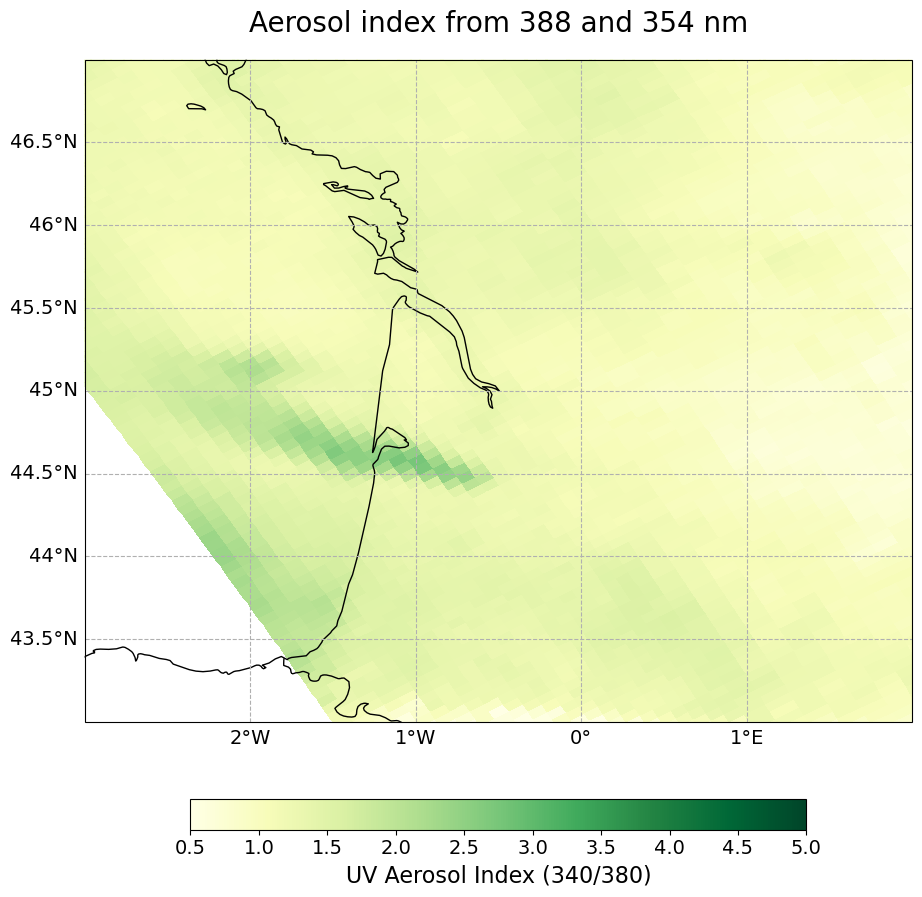

In [15]:
uvai = s5p_mf.aerosol_index_354_388[0,:,:]
uvai_masked=uvai.where(qa > 0.8) 

visualize_pcolormesh(data_array=uvai_masked,
                     longitude=lon,
                     latitude=lat,
                     projection=ccrs.PlateCarree(),
                     color_scale='YlGn',
                     unit= 'UV Aerosol Index (340/380)',
                     long_name=uvai.long_name,
                     vmin=0.5, 
                     vmax=5,
                     lonmin=lonmin,
                     lonmax=lonmax,
                     latmin=latmin,
                     latmax=latmax,
                     set_global=False)